In [7]:
!pip install pandas numpy matplotlib scipy seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42



In [8]:
# load data for svo 1080HD

data_producer_1080 = pd.read_csv('work/producer/HD1080_SN39574292_16-03-03_repaired.svo2.csv')
data_consumer_1080 = pd.read_csv('work/consumer/1080_160303_1000_1.csv')

data_producer_1080.columns = ['Retrieve', 'Encode', 'Broadcast']
data_consumer_1080.columns = ['message_received', 'data_transfer', 'decoding', 'updating_points']

total_df_1080 = pd.concat([data_producer_1080, data_consumer_1080], axis=1)

total_df_1080['encoding_decoding'] = total_df_1080['Encode'] + total_df_1080['decoding']

total_df_1080['total_time'] = total_df_1080['Retrieve'] + total_df_1080['Broadcast'] + total_df_1080['encoding_decoding'] + total_df_1080['data_transfer'] + total_df_1080['updating_points']

render_by_hand = [93.78, 128.36, 79.33, 87.11, 140.48, 81.25, 124.01]
# plot a segmented bar chart like a timeline where each component is a segment with a different color
# compute the means for each component

# Average values from your dataset
mean_retrieve = total_df_1080['Retrieve'].mean()
mean_encode = total_df_1080['Encode'].mean()
mean_broadcast = total_df_1080['Broadcast'].mean()

mean_data_transfer = total_df_1080['data_transfer'].mean()
mean_decoding = total_df_1080['decoding'].mean()
mean_updating_points = total_df_1080['updating_points'].mean()

mean_render= np.mean(render_by_hand)

# Durations and their cumulative start times
durations = [
    mean_retrieve,
    mean_encode,
    mean_broadcast,
    mean_data_transfer,
    mean_decoding,
    mean_updating_points,
]
labels = [
    "Retrieve",
    "Encode",
    "Broadcast",
    "Data Transfer",
    "Decoding",
    "Updating Points",
]
colors = ["red", "blue", "green", "orange", "purple", "cyan"]

# Calculate start times
start_times = [0]
for duration in durations[:-1]:  # Add cumulative start times
    start_times.append(start_times[-1] + duration)

# Plotting the timeline
fig, ax = plt.subplots(figsize=(25, 3))  # Wider figure for small components

for start, duration, label, color in zip(start_times, durations, labels, colors):
    ax.barh(0, duration, left=start, color=color, edgecolor="black", label=label)

# Customizing the plot
ax.set_xlim(0, sum(durations))
ax.set_yticks([])  # Remove Y-axis ticks
ax.set_xlabel("Average Time (ms)")
ax.set_title("Average Process Timeline for SVO1")
ax.legend(loc='upper center', ncol=3)  # Legend above the plot

# add ticks on the x-axis for each component
ax.set_xticks([start_times[0], start_times[1], start_times[2], start_times[3], sum(durations)])

plt.tight_layout()
plt.show()

print('Average time for rendering by hand:', mean_render)

# plot CDF for total time

plt.figure()
sns.kdeplot(total_df_1080['total_time'], cumulative=True)
plt.title('CDF for total on SVO1')
plt.xlabel('Total time (ms)')
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: 'work/producer/HD1080_SN39574292_16-03-03_repaired.svo2.csv'

In [ ]:
# load data for svo 720HD

data_producer_720 = pd.read_csv('work/producer/HD720_SN39574292_16-04-25_repaired.svo2.csv')
data_consumer_720 = pd.read_csv('work/consumer/720_160425_1000_1.csv')

data_producer_720.columns = ['Retrieve', 'Encode', 'Broadcast']
data_consumer_720.columns = ['message_received', 'data_transfer', 'decoding', 'updating_points']

total_df_720 = pd.concat([data_producer_720, data_consumer_720], axis=1)

total_df_720['encoding_decoding'] = total_df_720['Encode'] + total_df_720['decoding']

total_df_720['total_time'] = total_df_720['Retrieve'] + total_df_720['Broadcast'] + total_df_720['encoding_decoding'] + total_df_720['data_transfer'] + total_df_720['updating_points']

render_by_hand = [93.78, 128.36, 79.33, 87.11, 140.48, 81.25, 124.01]
# plot a segmented bar chart like a timeline where each component is a segment with a different color
# compute the means for each component

# Average values from your dataset
mean_retrieve = total_df_720['Retrieve'].mean()
mean_encode = total_df_720['Encode'].mean()
mean_broadcast = total_df_720['Broadcast'].mean()

mean_data_transfer = total_df_720['data_transfer'].mean()
mean_decoding = total_df_720['decoding'].mean()
mean_updating_points = total_df_720['updating_points'].mean()

mean_render= np.mean(render_by_hand)

# Durations and their cumulative start times
durations = [
    mean_retrieve,
    mean_encode,
    mean_broadcast,
    mean_data_transfer,
    mean_decoding,
    mean_updating_points,
]
labels = [
    "Retrieve",
    "Encode",
    "Broadcast",
    "Data Transfer",
    "Decoding",
    "Updating Points",
]
colors = ["red", "blue", "green", "orange", "purple", "cyan"]

# Calculate start times
start_times = [0]
for duration in durations[:-1]:  # Add cumulative start times
    start_times.append(start_times[-1] + duration)

# Plotting the timeline

fig, ax = plt.subplots(figsize=(25, 3))  # Wider figure for small components

for start, duration, label, color in zip(start_times, durations, labels, colors):
    ax.barh(0, duration, left=start, color=color, edgecolor="black", label=label)

# Customizing the plot
ax.set_xlim(0, sum(durations))
ax.set_yticks([])  # Remove Y-axis ticks
ax.set_xlabel("Average Time (ms)")
ax.set_title("Average Process Timeline for SVO2")
ax.legend(loc='upper center', ncol=3)  # Legend above the plot

# add ticks on the x-axis for each component
ax.set_xticks([start_times[0], start_times[1], start_times[2], start_times[3], sum(durations)])

plt.tight_layout()
plt.show()

print('Average time for rendering by hand:', mean_render)

# plot CDF for total time

plt.figure()
sns.kdeplot(total_df_720['total_time'], cumulative=True)
plt.title('CDF for total on SVO2')
plt.xlabel('Total time (ms)')
plt.show()



In [ ]:
# import rendering data
pd_three_js = pd.read_csv('rendering/threejs.csv')
pd_unity = pd.read_csv('rendering/UnityPerformanceResults.csv')

# add columns names (points, FPS)
pd_three_js.columns = ['points', 'FPS']
pd_three_js['engine'] = 'Three.js'
pd_unity.columns = ['points', 'FPS']
pd_unity['engine'] = 'Unity'
df = pd.concat([pd_unity,pd_three_js])
df.points /=1000
# plot the FPS for both rendering engines with marker = 'o'
plt.figure()
plt.plot(pd_three_js['points'], pd_three_js['FPS'], label='Three.js', marker='o')
plt.plot(pd_unity['points'], pd_unity['FPS'], label='Unity', marker='o')
plt.title('FPS comparison Three.js VS Unity')
plt.xlabel('Points')
plt.ylabel('FPS')
plt.legend()
# rotate ticks on x-axis
plt.xticks(rotation=45)
# show ticks without scientific notation
plt.ticklabel_format(style='plain')
plt.show()


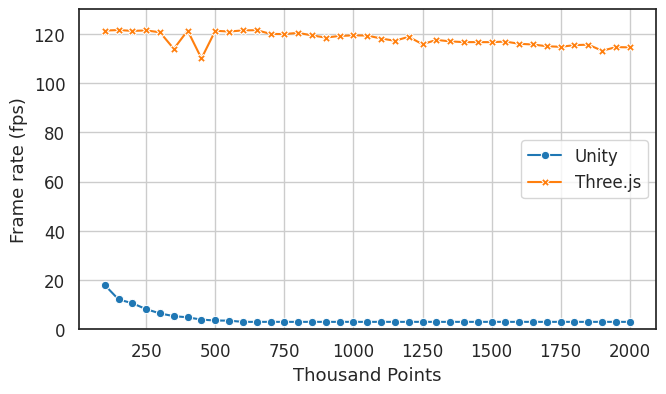

In [9]:
palette = sns.color_palette("tab10")

sns.set_theme(style="white", palette=palette,rc={'figure.figsize':(7,4)}, font_scale=1.09)

g = sns.lineplot(data=df, x='points', y='FPS',hue='engine',style='engine',markers=True, dashes=False)
g.grid(which='both')
g.set_ylim([0.000, 130])
g.set_ylabel('Frame rate (fps)')
g.set_xlabel('Thousand Points')
g.legend_.set_title(None)

plt.subplots_adjust(bottom=0.15, top=0.95,right=0.95)
sns.move_legend(g, "center right")
plt.savefig('rendering.pdf')
